In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.4.1


In [146]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [147]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [148]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results
    

In [149]:
# Nicholas Renotte (cant adjust circle radius)
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


In [150]:
#Adjustable circle_radius
def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(73, 0, 255), thickness=1, circle_radius=1)
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(70, 255, 0), thickness=1, circle_radius=1)
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=5),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 139, 0), thickness=1, circle_radius=1)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=5),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(244, 17, 100), thickness=1, circle_radius=1)
        )

In [151]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(73, 0, 255), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(70, 255, 0), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(255, 139, 0 ), thickness=1, circle_radius=5))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), mp_drawing.DrawingSpec(color=(244, 17, 100), thickness=1, circle_radius=5))


In [152]:
import cv2
import os

cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        
        if not ret:
            break
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    # os._exit(0)


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [157]:
len(results.face_landmarks.landmark)

468

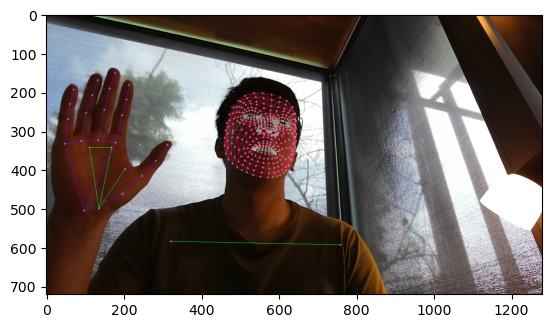

In [158]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [159]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [160]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [161]:
# if results.left_hand_landmarks:
#     lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()
#     print("Left hand landmarks shape:", lh.shape)
# else:
#     lh = np.array([])  # or some other default value
#     print("No left hand landmarks found")

# # Extract right hand landmarks if they exist
# if results.right_hand_landmarks:
#     rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
#     print("Right hand landmarks shape:", rh.shape)
# else:
#     rh = np.array([])  # or some other default value
#     print("No right hand landmarks found")

In [162]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [163]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [164]:
#Folder Creation
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [165]:
#COLLECTION
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                
                ret, frame = cap.read()
            
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                # draw_landmarks(image, results)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                if not ret:
                    break
                cv2.imshow('OpenCV Feed', image)
    
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    
    cap.release()
    cv2.destroyAllWindows()
    # os._exit(0)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [166]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [167]:
label_map = {label:num for num, label in enumerate(actions)}

In [168]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [169]:
np.array(sequences).shape

(90, 30, 1662)

In [170]:
np.array(labels).shape

(90,)

In [188]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [190]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [191]:
log_dir = os.path.join("Logs")
tb_callback = TensorBoard(log_dir = log_dir)

In [192]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [193]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [194]:
res = [.7, 0.2, 0.1]

In [195]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - categorical_accuracy: 0.3014 - loss: 3.7734
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.2954 - loss: 4.0404
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.4540 - loss: 8.0365
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.3249 - loss: 11.0060
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4032 - loss: 22.7664
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.2427 - loss: 18.7996
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.3366 - loss: 16.3417
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.2192 - loss: 10.7371
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3894 - loss: 5.3367
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3719 - loss: 7.8335
Epoch 11/2000
3/3 ━━━━━━

# TENSORBOARD CMD FOR WINDOWS
# python3 -m tensorboard.main --logdir=~/documents/github/signlanguagedetection

In [196]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [197]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[8.7572083e-09, 9.1697122e-27, 1.0000000e+00],
       [4.9546663e-16, 1.0000000e+00, 6.1540666e-09],
       [9.9993670e-01, 2.3516657e-06, 6.0892806e-05],
       [9.9999952e-01, 7.1305441e-11, 4.1860665e-07],
       [3.3673259e-15, 9.9999988e-01, 6.0452926e-08]], dtype=float32)

In [198]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [199]:
#Check
actions[np.argmax(res[1])]

'thanks'

In [200]:
#Check
actions[np.argmax(y_test[1])]

'thanks'

In [201]:
model.save('action.h5')

In [202]:
# del model

In [203]:
model.load_weights('action.h5')

In [204]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [205]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [206]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [207]:
# Predict on the test set
yhat = model.predict(X_test)

# Convert predictions and true labels to the same format
yhat = np.argmax(yhat, axis=1).tolist()
ytrue = np.argmax(y_test, axis=1).tolist()

# Print the first few predictions and true labels
print("Predictions:", yhat[:10])
print("True Labels:", ytrue[:10])

# Check lengths of ytrue and yhat
print("Length of ytrue:", len(ytrue))
print("Length of yhat:", len(yhat))

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytrue, yhat)
print("Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predictions: [2, 1, 0, 0, 1]
True Labels: [2, 1, 0, 0, 1]
Length of ytrue: 5
Length of yhat: 5
Accuracy: 1.0


In [225]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame

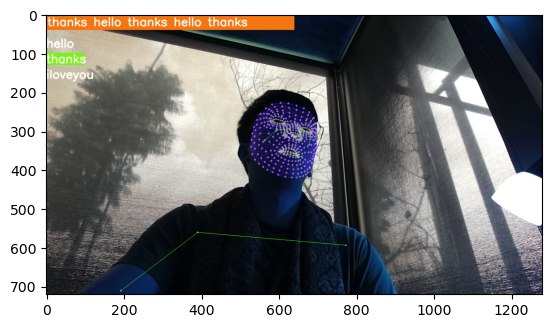

In [226]:
plt.imshow(prob_viz(res, actions, image, colors))

In [229]:
sequence = []
sentence = []
predictions = []
threshold = 0.7


cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #Prediction logic
        keypoints = extract_keypoints(results)
        # sequence.insert(0, keypoints)
        # sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        #Visualization logic, checking if last prediction is same as current predictions, if it is then dont append
        if np.unique(predictions[-10:])[0]==np.argmax(res):
            if res[np.argmax(res)] > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
    
            if len(sentence) > 5:
                sentence = sentence[-5:]
    
            #Visualization probabilities
            image = prob_viz(res, actions, image, colors)
        

        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        if not ret:
            break
        cv2.imshow('OpenCV Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()
    # os._exit(0)


<class 'mediapipe.python.solution_base.SolutionOutputs'>


IndexError: index 0 is out of bounds for axis 0 with size 0

In [230]:
import cv2
import mediapipe as mp
import numpy as np

# Assuming these functions and variables are defined elsewhere:
# mediapipe_detection, draw_styled_landmarks, extract_keypoints, model, actions, prob_viz, colors

sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(1)
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Visualization logic
            if len(predictions) >= 10 and np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualization probabilities
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti